In [42]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from ndl.preprocessing import ImageToArrayPreprocessor
from ndl.preprocessing import SimplePreprocessor
from ndl.datasets import SimpleDatasetLoader
from ndl.nn.conv import ShallowNet
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

In [25]:
dataset = '../datasets/animals'

# grab the list of images that we'll be describing
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset))

[INFO] loading images...


In [26]:
# initialize the image preprocessors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

In [27]:
# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float") / 255.0

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [28]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25)

In [29]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [30]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


In [31]:
# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=32, epochs=100, verbose=1)

[INFO] training network...
Train on 2250 samples, validate on 750 samples
Epoch 1/100
2250/2250 [==============================] - 1s 258us/step - loss: 1.0094 - acc: 0.4831 - val_loss: 0.9290 - val_acc: 0.5333
Epoch 2/100
2250/2250 [==============================] - 0s 205us/step - loss: 0.9139 - acc: 0.5444 - val_loss: 0.9113 - val_acc: 0.5267
Epoch 3/100
2250/2250 [==============================] - 1s 223us/step - loss: 0.8697 - acc: 0.5711 - val_loss: 0.8615 - val_acc: 0.5693
Epoch 4/100
2250/2250 [==============================] - 0s 218us/step - loss: 0.8537 - acc: 0.5560 - val_loss: 0.8419 - val_acc: 0.5800
Epoch 5/100
2250/2250 [==============================] - 0s 207us/step - loss: 0.8282 - acc: 0.5924 - val_loss: 0.8554 - val_acc: 0.5827
Epoch 6/100
2250/2250 [==============================] - 0s 206us/step - loss: 0.8199 - acc: 0.5760 - val_loss: 0.8390 - val_acc: 0.5600
Epoch 7/100
2250/2250 [==============================] - 0s 209us/step - loss: 0.8009 - acc: 0.5982 - va

Epoch 60/100
2250/2250 [==============================] - 0s 205us/step - loss: 0.4720 - acc: 0.8156 - val_loss: 0.7897 - val_acc: 0.6413
Epoch 61/100
2250/2250 [==============================] - 0s 199us/step - loss: 0.4682 - acc: 0.8147 - val_loss: 0.7556 - val_acc: 0.6707
Epoch 62/100
2250/2250 [==============================] - 0s 210us/step - loss: 0.4625 - acc: 0.8222 - val_loss: 0.7139 - val_acc: 0.6853
Epoch 63/100
2250/2250 [==============================] - 0s 198us/step - loss: 0.4525 - acc: 0.8236 - val_loss: 0.8211 - val_acc: 0.6373
Epoch 64/100
2250/2250 [==============================] - 0s 204us/step - loss: 0.4549 - acc: 0.8169 - val_loss: 0.7043 - val_acc: 0.6813
Epoch 65/100
2250/2250 [==============================] - 0s 212us/step - loss: 0.4501 - acc: 0.8227 - val_loss: 0.7147 - val_acc: 0.6747
Epoch 66/100
2250/2250 [==============================] - 0s 196us/step - loss: 0.4445 - acc: 0.8262 - val_loss: 0.7232 - val_acc: 0.6827
Epoch 67/100
2250/2250 [==========

In [37]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
c_report = classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_)
print(c_report)

[INFO] evaluating network...
             precision    recall  f1-score   support

       cats       0.55      0.86      0.67       247
       dogs       0.69      0.35      0.47       255
      panda       0.89      0.85      0.87       248

avg / total       0.71      0.68      0.67       750



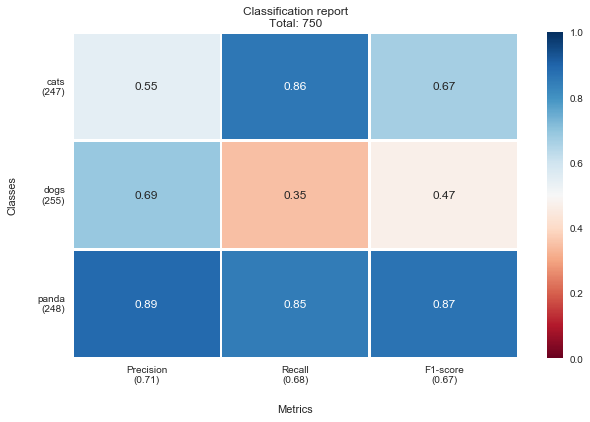

In [40]:
from ndl.utils.plot import plotClassificationReport
plotClassificationReport(c_report)

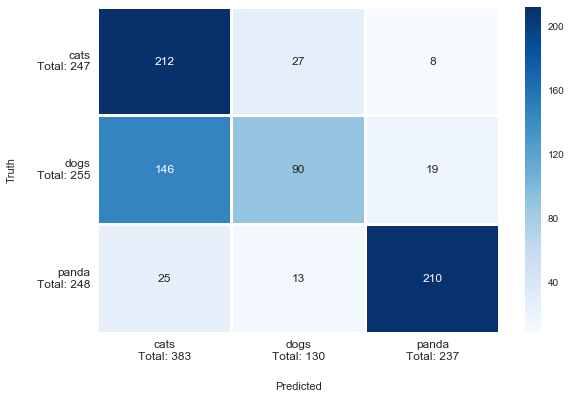

In [44]:
from ndl.utils.plot import plotConfusionMatrix
matrix = confusion_matrix(testY.argmax(axis=1), predictions.argmax(axis=1))
plotConfusionMatrix(matrix, lb.classes_)

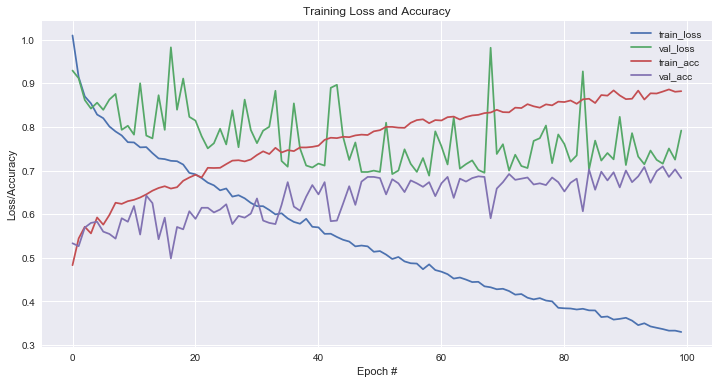

In [33]:
import seaborn as sns
sns.set()
%matplotlib inline

plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

Examining this figure, we can see that learning is a bit volatile with large spikes in loss around epoch 20 and epoch 70 – this result is likely due to our learning rate being too high. After epoch 30 our training and testing loss diverge significantly which probably means we are overfitting.

Around epoch 60 our testing accuracy saturates and we are unable to go over 70% and our training accuracy keeps rising to almost 90%. Another sign of overfitting which we can deal with by getting more data, data augmentation or tuning the learning rate.

The main point is that a very simple CNN was able to improve significantly from our previous result of 53% to around 70%